In [1]:
import os
import random
import numpy as np
import torch
import torch.utils.data as data

from PIL import Image, ImageOps, ImageFilter
from matplotlib import pyplot as plt

<PIL.PngImagePlugin.PngImageFile image mode=L size=2048x1024 at 0x2AFCD519FB50>


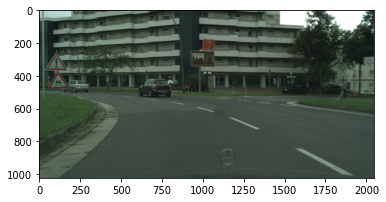

In [2]:
mask_sig = Image.open('./signate_datasets/seg_train_annotations/train_0000.png')
img_sig = Image.open('./signate_datasets/seg_train_images/train_0000.jpg')
mask_city = Image.open('./datasets/citys/gtFine/train/aachen/aachen_000000_000019_gtFine_labelIds.png')
img_city = Image.open('./datasets/citys/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png')
plt.imshow(img_city)
print(mask_city)

(128, 64)
L
14 17 16 10 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 
16 20 19 15 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 
18 23 21 12 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 
18 23 21 12 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 
18 23 22 13 11 11 11 11 11 11 11 11 11 11 11 11 11 11 13 18 
18 23 22 13 11 11 11 11 11 11 11 11 11 11 11 11 12 16 19 20 
18 23 22 13 11 11 11 11 11 11 11 11 11 11 11 13 17 20 20 20 
18 23 21 12 11 11 11 11 11 11 11 11 11 11 11 12 13 17 20 20 
18 23 21 12 11 11 11 11 11 11 11 11 11 11 11 11 11 12 15 19 
18 23 20 12 11 11 11 11 11 11 9 11 11 11 11 11 11 11 11 12 
18 23 19 11 11 11 11 11 12 11 5 9 11 11 11 11 11 11 11 11 
18 23 18 11 11 11 11 11 12 12 7 9 11 11 11 11 11 11 11 11 
12 15 14 11 11 11 11 11 11 12 12 12 11 11 11 11 11 11 11 11 
9 11 11 11 11 11 11 11 11 11 11 12 13 13 12 11 11 11 11 11 
9 11 11 11 11 11 11 11 11 11 11 11 11 12 13 13 13 13 13 12 
9 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 13 13 
9 11 11 11 11 11 11 11 11 11 11 11 1

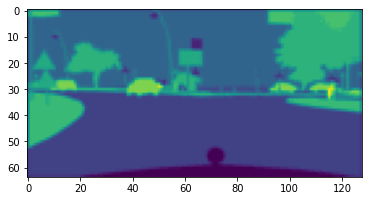

In [4]:
mask_city_down = mask_city.resize((128, 64), Image.BILINEAR)
print(mask_city_down.size)
print(mask_city.mode)

plt.imshow(np.array(mask_city_down))

for i in range(20):
    for j in range(20):
        print(mask_city_down.getpixel((i, j)), end=' ')
    print()

(128, 64)
L
[  0  29  64  70  75  76 115 117 136 146 150 155 179 181]
63 82 83 93 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 
100 130 132 140 141 141 141 141 141 141 141 141 141 141 141 141 141 141 141 141 
90 117 121 136 137 137 137 137 137 137 137 137 137 138 138 138 138 138 138 138 
88 115 119 135 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 138 
88 115 118 133 136 136 136 136 136 136 136 136 136 136 136 136 136 136 141 150 
88 115 117 132 136 136 136 136 136 136 136 136 136 136 136 136 138 146 153 155 
88 115 117 133 136 136 136 136 136 136 136 136 136 136 136 140 149 155 155 155 
88 115 118 133 136 136 136 136 136 136 136 136 136 136 136 138 141 149 154 155 
88 115 119 134 136 136 136 136 136 136 136 136 136 136 136 136 136 137 144 152 
88 115 120 135 136 136 136 136 136 133 103 129 136 136 136 136 136 136 136 139 
88 115 121 135 136 136 136 136 138 116 24 97 136 136 136 136 136 136 136 136 
88 115 124 136 136 136 136 136 138 128 51 106 136 136 136 136 136 136 

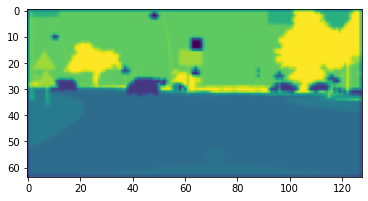

In [9]:
city2sig_pallette = np.array([0, 70, 0, 0, 0,
                              0, 0, 64, 179, 0,
                              0, 136, 122, 122, 0,
                              0, 0, 146, 0, 226,
                              155, 181, 75, 115, 76,
                              117, 29, 69, 183, 0,
                              0, 82, 117, 150, 0, 0])
sig_im = Image.fromarray(np.uint8(np.maximum(0, city2sig_pallette[np.asarray(mask_city).ravel()]).reshape(1024, 2048))).convert('L')
plt.imshow(sig_im)

sig_im_down = sig_im.resize((128, 64), Image.BILINEAR)
print(sig_im_down.size)
print(sig_im.mode)
print(np.unique(np.asarray(sig_im).ravel()))
plt.imshow(np.array(sig_im_down))

for i in range(20):
    for j in range(20):
        print(sig_im_down.getpixel((i, j)), end=' ')
    print()

(1936, 1216)
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136

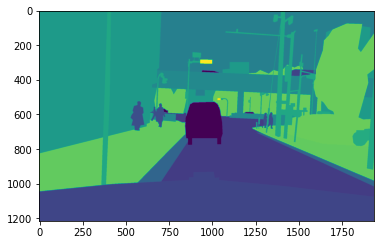

In [8]:
print(mask_sig.size)
plt.imshow(np.array(mask_sig.convert('L')))
mask_sig = mask_sig.convert('L')
for i in range(20):
    for j in range(20):
        print(mask_sig.getpixel((i, j)), end=' ')
    print()
print(np.unique(np.asarray(mask_sig).ravel()))

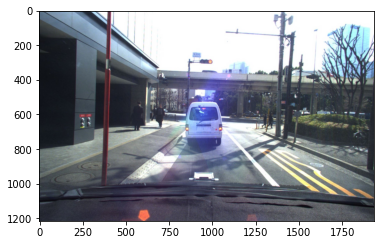

In [27]:
color_to_idx = np.array(
    [[0, 0, 255],
    [193, 214, 0],
    [180, 0, 129],
    [255, 121, 166],
    [255, 0, 0],
    [65, 166, 1],
    [208, 149, 1],
    [255, 255, 0],
    [255, 134, 0],
    [0, 152, 225],
    [0, 203, 151],
    [85, 255, 50],
    [92, 136, 125],
    [69, 47, 142],
    [136, 45, 66],
    [0, 255, 255],
    [215, 0, 255],
    [180, 131, 135],
    [81, 99, 0],
    [86, 62, 67]])
pallette_test = np.array(
    [[[0, 0, 255], [193, 214, 0], [180, 0, 129], [255, 121, 166]],
    [[255, 0, 0], [65, 166, 1], [208, 149, 1], [255, 255, 0]],
    [[255, 134, 0], [0, 152, 225], [0, 203, 151], [85, 255, 50]],
    [[92, 136, 125], [69, 47, 142], [136, 45, 66], [0, 255, 255]],
    [[215, 0, 255], [180, 131, 135], [81, 99, 0], [86, 62, 67]]])
plt.imshow(img_sig)

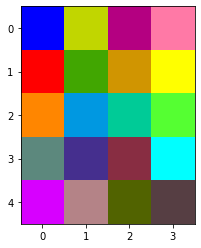

In [47]:
from PIL import ImageDraw

im = Image.fromarray(np.uint8(pallette_test))
plt.imshow(np.array(im))

[[ 29 183  69 166]
 [ 76 117 150 226]
 [155 115 136 181]
 [122  64  75 179]
 [ 93 146  82  70]]


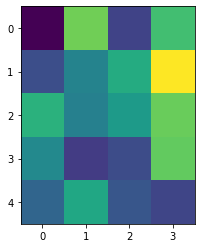

In [50]:
im_L = im.convert('L')
plt.imshow(im_L)
print(np.asarray(im_L))

In [61]:
key = np.ones(10)
key = key * -1
indices = [1, 2, 4]
print((np.asarray(indices) + 2).tolist())
print(range(3))
key[indices] = range(3) 
print(key)

[3, 4, 6]
range(0, 3)
[-1.  0.  1. -1.  2. -1. -1. -1. -1. -1.]


In [64]:
num_class = 3
valid_classes = [3, 4, 12]
key = np.ones(14) * -1
key[(np.asarray(valid_classes) + 1).tolist()] = range(num_class)
print(key)


[-1. -1. -1. -1.  0.  1. -1. -1. -1. -1. -1. -1. -1.  2.]


In [14]:
a = np.array([-1, 2, 3])
print(np.maximum(0, a))

[0 2 3]


In [10]:
%ls

LICENSE       datasets/      eval.py.lprof      seg_codes/         utils/
README.md     demo.py        index-value.ipynb  signate_datasets/  weights/
__pycache__/  demo.py.lprof  models/            test_result/
data_loader/  eval.py        png/               train.py


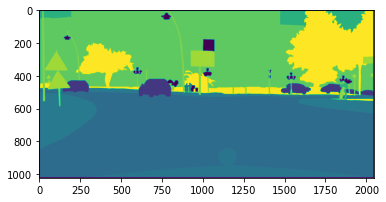

In [12]:
img4 = Image.open('signate_datasets/city4sig_pretrain/gt/aachen_000000_000019_gtFine_labelIds.png')      
plt.imshow(img4)

In [1]:
%ls

LICENSE       datasets/      eval.py.lprof      seg_codes/         utils/
README.md     demo.py        index-value.ipynb  signate_datasets/  weights/
__pycache__/  demo.py.lprof  models/            test_result/
data_loader/  eval.py        png/               train.py


In [5]:
import shutil
for i in range(1642, 2243):
    shutil.move(os.path.join('signate_datasets', 'seg_train_annotations', 'train_{}.png'.format(str(i)), 'signate_datasets/seg_val_annotations')